In [1]:
from gensim.models import Word2Vec

In [2]:
text_en = "The text of the rule will be written in the paper. \
He does not agree with this law. \
He is thankful for my support and this help. \
It was interesting. \
It was a good season to have a lunch."

In [3]:
text_en_ml = "detdefsp nsg pr detdefsp nsg vauxinf vbserinf vblexpp pr detdefsp nsg \
prnsubjp3msg vbdopresp3sg adv vblexinf pr detdemsg nsg \
prnsubjp3msg vbserpresp3sg adj pr detpossp nsg cnjcoo detdemsg nsg \
prnsubjp3ntsg vbserpastp3sg vblexger \
prnsubjp3ntsg vbserpastp3sg detindsg adjsint nsg pr vblexinf detindsg nsg"

In [28]:
import re
regex = r'\w+'

In [31]:
vocab_en = re.findall(regex, text_en.lower())
vocab_en_ml = text_en_ml.split(" ")

In [74]:
import collections
def build_corpus(words):
    count = collections.Counter(words).most_common()
    corpus, ignore_corpus = [], []
    for word, _ in count:
#         if _ > 1:
        corpus.append(word)
#         else:
#             ignore_corpus.append(word)
    return corpus, ignore_corpus

In [75]:
corpus_en, ignore_corpus_en = build_corpus(" ".join(vocab_en).split())
corpus_en_ml, ignore_corpus_en_ml = build_corpus(" ".join(vocab_en_ml).split())

In [76]:
cleaned_texts_en = [[word for word in text.split() if word not in ignore_corpus_en] for text in vocab_en]
cleaned_texts_en_ml = [[word for word in text.split() if word not in ignore_corpus_en_ml] for text in vocab_en_ml]


In [77]:
model_en = Word2Vec(cleaned_texts_en, size=100, window=5, min_count=1, workers=4)
model_en.train(cleaned_texts_en, total_examples=len(corpus_en), epochs=30)

(250, 1170)

In [78]:
model_en_ml = Word2Vec(cleaned_texts_en_ml, size=100, window=5, min_count=1, workers=4)
model_en_ml.train(cleaned_texts_en_ml, total_examples=len(corpus_en_ml), epochs=30)

(182, 1170)

In [79]:
list_vector_en = [(word, model_en[word]) for word in map(str, corpus_en)]
list_vector_en_ml = [(word, model_en_ml[word]) for word in map(str, corpus_en_ml)]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [83]:
import numpy as np
import pandas as pd

In [84]:
values_en = list(zip(*list_vector_en))[0]
vectors_en = np.matrix(list(zip(*list_vector_en))[1])
values_en_ml = list(zip(*list_vector_en_ml))[0]
vectors_en_ml = np.matrix(list(zip(*list_vector_en_ml))[1])

In [85]:
vector_en_df = pd.DataFrame(vectors_en, columns=list(map(str, np.arange(0, 100))), index=values_en)
vector_en_ml_df = pd.DataFrame(vectors_en_ml, columns=list(map(str, np.arange(0, 100))), index=values_en_ml)

In [95]:
vector_en_ml_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
nsg,0.003835,0.002816,-0.003286,-0.001736,-0.003462,-0.004158,-0.004724,0.004149,-0.002886,0.004677,...,-0.004794,0.000497,0.002977,0.004046,-0.002958,-0.000840,-0.003359,-0.003465,0.000065,-0.002119
pr,-0.002373,-0.000073,-0.001352,-0.004694,-0.000061,-0.003509,-0.000948,-0.002733,-0.002524,0.003934,...,0.002243,0.000604,-0.002660,0.001496,0.003866,0.003660,-0.001988,-0.002705,-0.001344,-0.002911
detdefsp,0.004680,0.003117,0.000312,0.000669,-0.002617,-0.001702,-0.000729,0.004551,-0.000502,0.003573,...,-0.002318,-0.001209,-0.003509,0.000573,0.004093,-0.002700,-0.001279,0.003026,-0.003047,-0.004982
prnsubjp3msg,0.004699,0.003378,-0.003057,0.004843,0.000732,-0.004161,0.004518,-0.003265,0.002178,-0.000512,...,0.003318,-0.002085,-0.004911,0.002749,0.001461,-0.001167,-0.000214,0.001212,-0.001637,-0.001623
vblexinf,-0.002423,0.002955,-0.000695,-0.000973,0.004620,-0.002093,0.002159,-0.004954,-0.000983,-0.001946,...,-0.004044,0.000691,0.001725,0.002982,0.003367,0.003862,-0.004674,0.004674,-0.003154,-0.001525


In [87]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [88]:
scaled_vector_en_df = vector_en_df.copy()
scaled_vector_en_ml_df = vector_en_ml_df.copy()

In [89]:
scaled_vector_en_df[:] = scaler.fit_transform(vector_en_df)
scaled_vector_en_ml_df[:] = scaler.fit_transform(vector_en_ml_df)

In [90]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [91]:
pca = PCA(n_components=2)
pca_scaled_vector_en_df = pca.fit_transform(scaled_vector_en_df)
pca_scaled_vector_en_ml_df = pca.fit_transform(scaled_vector_en_ml_df)

In [92]:
y_en=pca_scaled_vector_en_df.T[1]
z_en=pca_scaled_vector_en_df.T[0]
n_en=values_en

y_en_ml=pca_scaled_vector_en_ml_df.T[1]
z_en_ml=pca_scaled_vector_en_ml_df.T[0]
n_en_ml=values_en_ml

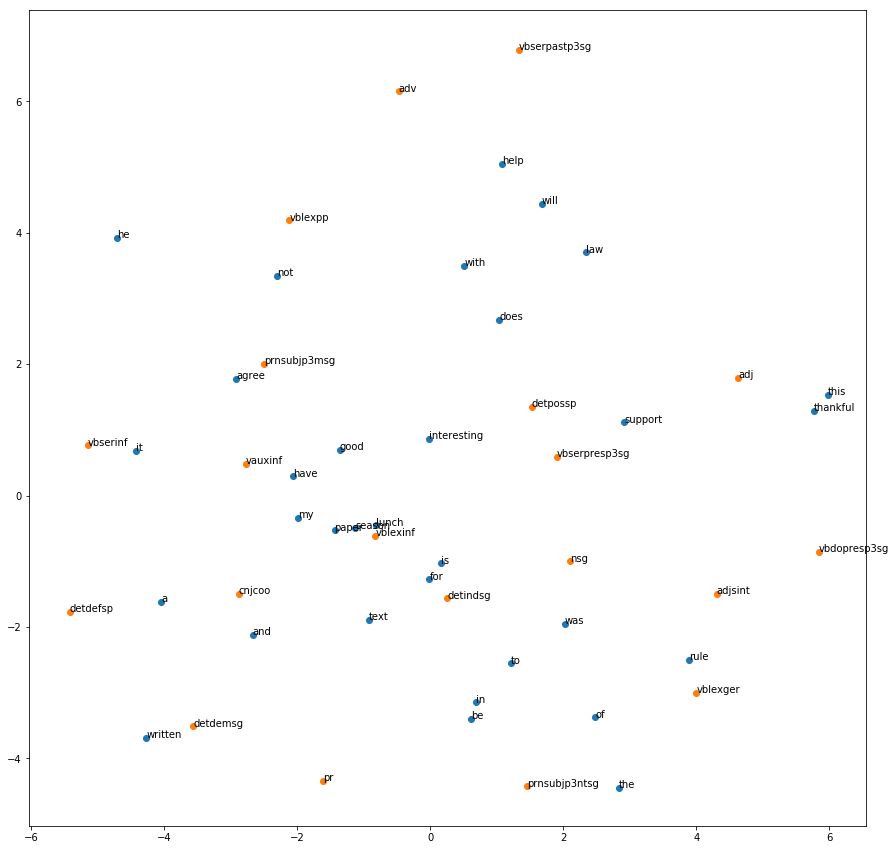

In [96]:
fig, ax = plt.subplots(figsize=(15,15))
ax.scatter(z_en, y_en)

for i, txt in enumerate(n_en):
    ax.annotate(txt, (z_en[i],y_en[i]))
    
ax.scatter(z_en_ml, y_en_ml)

for i, txt in enumerate(n_en_ml):
    ax.annotate(txt, (z_en_ml[i],y_en_ml[i]))